<a href="https://colab.research.google.com/github/jonathjd/eccomerce-linear-regression-model/blob/main/Eccomerce%20Linear%20Regression%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression Project**

Congratulations! 

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

**Imports**

Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

(You'll import sklearn as you need it.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the Data**

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:



*   Avg. Session Length: Average session of in-store style advice sessions.
*   Time on App: Average time spent on App in minutes
*   Time on Website: Average time spent on Website in minutes
*   Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Ecommerce Customers to Ecommerce Customers


In [3]:
df_customers = pd.read_csv('Ecommerce Customers')

In [4]:
df_customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


DataFrame has a total of 500 entries

3 columns are object type names

5 columns are float64 objects


In [6]:
df_customers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


# Exploratory Data Analysis

Let's explore the data!

For the rest of the exercise we'll only be using the numerical data of the csv file.



**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

**Does the correlation make sense?**

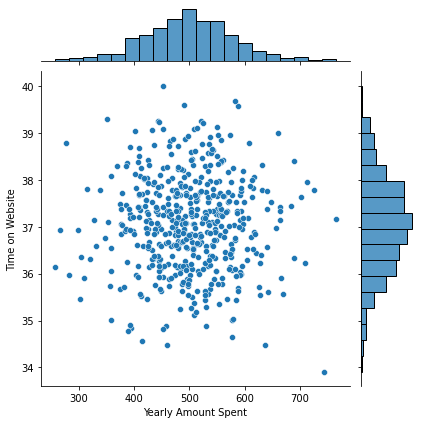

In [7]:
sns.jointplot(data=df_customers, x = df_customers['Yearly Amount Spent'], y = df_customers['Time on Website'])

There doesnt seem to be a correlation betwee the time spend on the website and the yearly amount spent

**Do the same but with the Time on App column instead.**

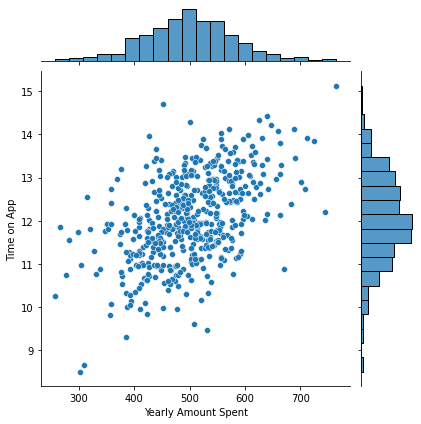

In [8]:
sns.jointplot(data=df_customers, x = df_customers['Yearly Amount Spent'], y = df_customers['Time on App'])

There looks to be a linear relationship between time spent on the app and the yearly amount spent by customers

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

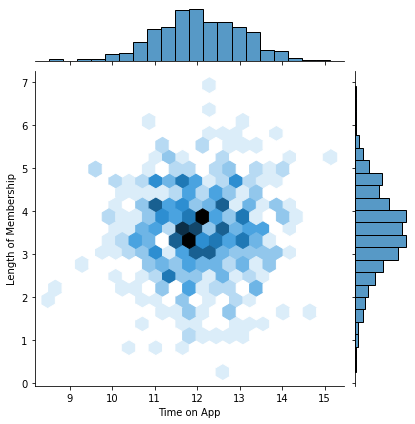

In [9]:
sns.jointplot(data = df_customers, x = df_customers['Time on App'], y = df_customers['Length of Membership'], kind = 'hex')

**Let's explore these types of relationships across the entire data set.**

Use pairplot to recreate the plot below. (Don't worry about the the colors)

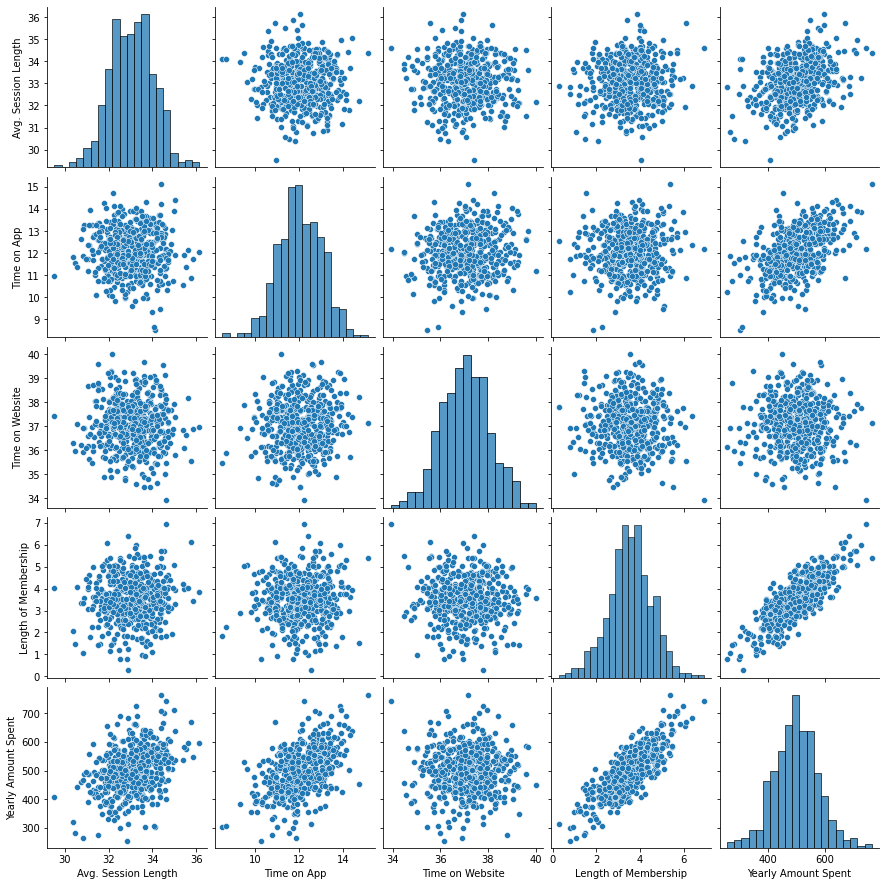

In [10]:
sns.pairplot(data = df_customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of membership seems to be positively correlated with Yearly Amount Spent

***Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership. ***

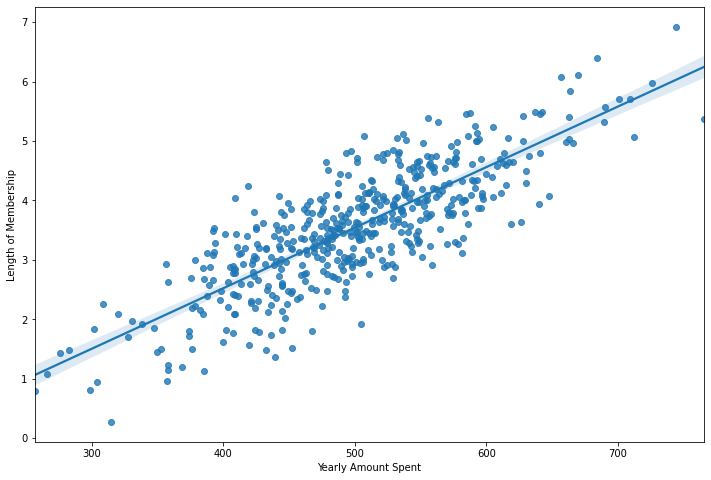

In [11]:
plt.figure(figsize = (12,8))
sns.regplot(data = df_customers, x = df_customers['Yearly Amount Spent'], y = df_customers['Length of Membership'])

Used sns.regplot because sns.lmplot was giving error message for some reason.


# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. 

**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [12]:
X = df_customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df_customers['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets.**

**Set test_size=0.3 and random_state=101**

​

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

# Training the Model
Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [17]:
from sklearn.linear_model import LinearRegression

**Create and instance of a LinearRegression() model and name it**

In [18]:
regr = LinearRegression()

**Train/fit regr on the training data.**

In [19]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [20]:
#Coefficients

print('Coefficients: \n', regr.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data

Now that we have our model, lets evaluate its performance by predicting off the test values!

**Use regr.predict( X_test )

In [21]:
predictions = regr.predict(X_test)

**Create a scatter plot of the real test values versus the predicted values**

Text(0, 0.5, 'Predicted Y')

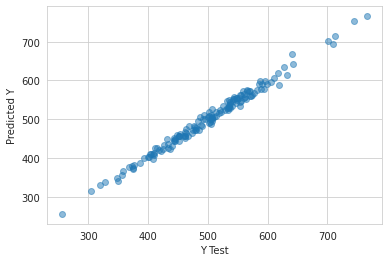

In [27]:
plt.scatter(y_test,predictions, alpha = 0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

Lets evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2)

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or the wiki for the formulas.**

In [29]:
from sklearn import metrics

In [30]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 7.22814865343083
MSE 79.81305165097457
RMSE 8.93381506697864


In [38]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889607

#Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the resifuals to make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist()**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


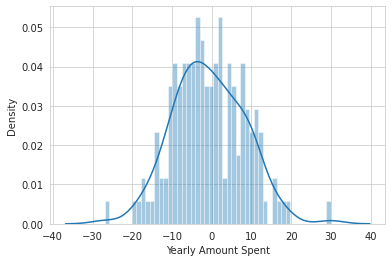

In [36]:
sns.distplot((y_test-predictions), bins = 50)

# Conclusion

We still want to figure out the answer to the original question, do we focus our effors on the mobile app or the website development? Or maybe that doesnt even really matter, Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [37]:
coefficients = pd.DataFrame(regr.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**How can you interpret these coefficients?**

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.



**Do you think the company should focus more on their mobile app or on their website?**



I think the company should focus on improving their time of the app while slowly adjusting the time on the website.


Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.